# PV Reconstruction Analysis

## Dataset Overview
- **Total size:** ~255,500 primary vertices (PVs)
- **Creation script:** `pv_dataset_27.cpp`

## Key Points

### 1. Resolution Dependence on Track Selection
Resolution significantly depends on the minimum number of tracks available for PV reconstruction. The current selection requires at least 4 tracks:


```cpp
if (KFParticles_PV.size() < 4) continue;
```

* Current PV acceptance: 0.737

* Similar improvement can be achieved by requiring a minimum number of tracks per vertex after the re-fit procedure, which improves resolution while rejecting some PVs.

### 2. Unexplored Selection Factors
The following track selection criteria remain unexplored in this analysis:
```cpp
if (trkPos.Perp() > 0.3 || (PV_pos_prefit - trkPos).Mag() > 0.4) continue;
```

### 3. Re-fit Implementation Notes
* Two PV re-fit implementations have been explored (both in `pv_dataset_27.cpp`)
* PV acceptance is independent of re-fit variant unless restrictions are applied to `tracks_per_vertex` after re-fitting

## Performance Summary
|          | no re-fit | Var I | Var II |
|----------|---------------|---|--------|
|  **x**   |   57.86   | 54.06 | 55.87  |
|  **y**   |   57.74   | 54.05 | 55.12  |
|  **z**   |   64.69   | 59.87 | 62.03  |

### Example of hard selection:

1. if (KFParticles_PV.size() < 5) continue;
2. `tracks_per_vertex` after re-fitting > 5;

# Distributions before PV re-fit

## Prepare Env & Import Data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import os


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_2.csv')

## max_chi2 distribution

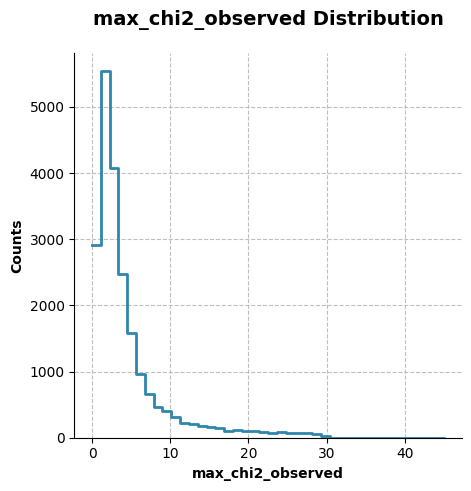

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))

distr_name = 'max_chi2_observed'

sns.histplot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    x=distr_name,
    color='#2E86AB',
    alpha=1,
    element='step',
    fill=False,
    linewidth=2,
    bins=40,
    ax=ax
)

ax.set_title(f'{distr_name} Distribution', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel(f'{distr_name}', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(True, alpha=0.8, linestyle='--')

In [11]:
PV_diff_x = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_x']
PV_diff_y = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_y']
PV_diff_z = df.loc[df['max_chi2_cut'] == 30.0, 'PV_diff_z']


# zeroth approximation
print(f'x-projection PV resolution [cm]: {PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4}')
print(f'y-projection PV resolution [cm]: {PV_diff_y[abs(PV_diff_x) < 0.03].std() * 1e4}')
print(f'z-projection PV resolution [cm]: {PV_diff_z[abs(PV_diff_x) < 0.03].std() * 1e4}')

x-projection PV resolution [cm]: 76.9529610079893
y-projection PV resolution [cm]: 101.00247485192561
z-projection PV resolution [cm]: 123.34041128889754


### x-projection

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 423
Final objective value: 17020.407535
Chi-squared: nan
Reduced chi-squared: nan
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 0.0000 +- nan
         mu = 0.029100 +- nan
         sigma = 0.029168 +- nan
Gauss 2: A = 0.0000 +- nan
         mu = -0.029235 +- nan
         sigma = 0.029168 +- nan
Constant: C = 94.7898 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: nan +- nan
Effective Sigma: nan
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 2

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:370: RuntimeWarning: invalid value encountered in scalar divide
  w1 = A1 / total_amplitude
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:371: RuntimeWarning: invalid value encountered in scalar divide
  w2 = A2 / total_amplitude
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:388: RuntimeWarning: invalid value encountered in scalar divide
  dmean_dA1 = (mu1 - mu2) * A2 / (total_amplitude**2)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:389: RuntimeWarning: invalid value encountered in scalar divide
  dmean_dA2 = (mu2 - mu1) * A1 / (total_amplitude**2)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:403: RuntimeWarning: invalid value encountered in scalar divide
  df_sigma2_dA1 = (si

Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 2391.860453
Chi-squared: 2391.86
Reduced chi-squared: 72.481
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 560.8815 +- 1007.6478
         mu = 0.000044 +- 0.000977
         sigma = 0.007099 +- 0.003261
Gauss 2: A = 560.4114 +- 984.7965
         mu = 0.000143 +- 0.001013
         sigma = 0.007870 +- 0.003794
Constant: C = 34.3172 +- 15.4339
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000093 +- 0.000706
Effective Sigma: 0.007494 +- 0.002566
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 231
Final objective value: 522.586096
Chi-squared: 522.59
Reduced chi-squared: 15.836
-----------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Max. number of function evaluations reached
Number of iterations: 19
Final objective value: 12569.849062
Chi-squared: 12569.85
Reduced chi-squared: 380.905
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 222.7536 +- 114.3492
         mu = -0.000251 +- 0.002614
         sigma = 0.014066 +- 0.004531
Gauss 2: A = 9.2053 +- nan
         mu = -0.005547 +- nan
         sigma = 0.014584 +- 0.028370
Constant: C = 11.7636 +- 57.6099
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000462 +- nan
Effective Sigma: 0.014087 +- nan
Method: COBYLA
Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final

/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 372
Final objective value: 35.555538
Chi-squared: 35.56
Reduced chi-squared: 1.077
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1524.2144 +- 41.7291
         mu = -0.000089 +- 0.000049
         sigma = 0.003806 +- 0.000090
Gauss 2: A = 680.7438 +- 42.9407
         mu = 0.000277 +- 0.000087
         sigma = 0.008696 +- 0.000214
Constant: C = 28.5754 +- 2.1246
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000024 +- 0.000044
Effective Sigma: 0.005776 +- 0.000133
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
********************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


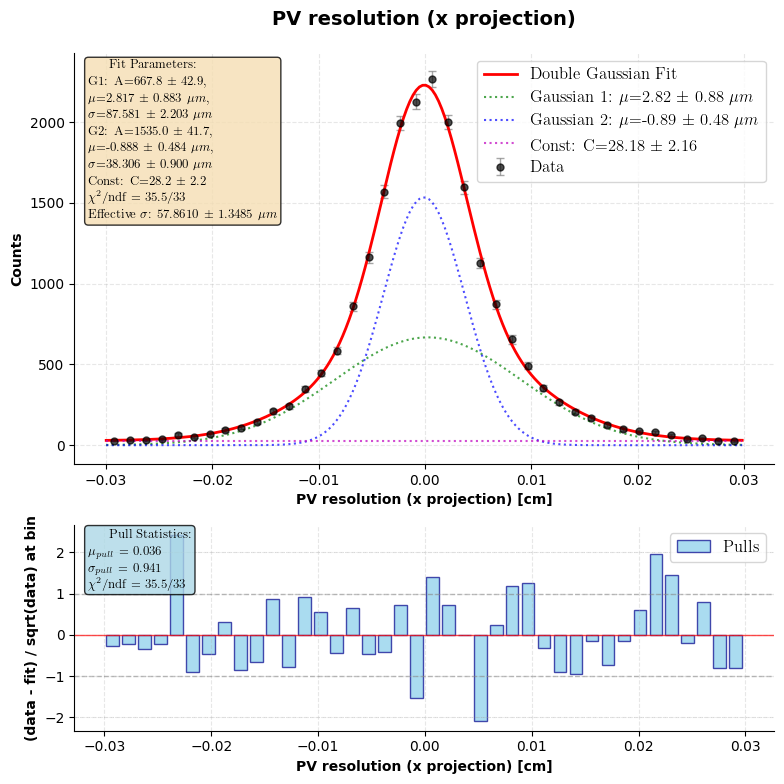

In [12]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_x'
sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection)',
    x_label='PV resolution (x projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 422
Final objective value: 16858.456814
Chi-squared: nan
Reduced chi-squared: nan
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 0.0000 +- nan
         mu = 0.029242 +- nan
         sigma = 0.029234 +- nan
Gauss 2: A = 1.3987 +- nan
         mu = -0.029226 +- nan
         sigma = 0.029234 +- nan
Constant: C = 96.8281 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.029226 +- nan
Effective Sigma: 0.029234 +- nan
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Numbe

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 502
Final objective value: 1492.674308
Chi-squared: 1492.67
Reduced chi-squared: 45.233
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1340.7688 +- 79.5711
         mu = 0.000034 +- 0.000261
         sigma = 0.006688 +- 0.000276
Gauss 2: A = 15.9454 +- 130.6480
         mu = -122.243095 +- 950.073762
         sigma = -60.213092 +- 468.441084
Constant: C = 44.7100 +- 14.9338
------------------------------------------------------------
Derived quantities:
Effective Mean: -1.436684 +- 16.125295
Effective Sigma: 6.527767 +- 57.249593
Method: BFGS


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 588
Final objective value: 467.464391
Chi-squared: 467.46
Reduced chi-squared: 14.166
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1960.5098 +- 54.9084
         mu = 0.000046 +- 0.000118
         sigma = 0.005544 +- 0.000124
Gauss 2: A = 1659.3046 +- 911.7189
         mu = 25.792152 +- 102.068093
         sigma = 19.464677 +- 78.526779
Constant: C = -636.5485 +- 1046.3900
------------------------------------------------------------
Derived quantities:
Effective Mean: 11.823017 +- 46.919944
Effective Sigma: 13.178535 +- 53.202693
Method: Newton-CG
Skip method: Newton-CG
Method: L-BFGS-B
Optimization result:
Success: True
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
Number of iterations: 67
Final objective value: 104.417837
Chi-squared: 104.42
Reduced chi-squared: 3.164
----

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 15177.245560
Chi-squared: 15177.25
Reduced chi-squared: 459.917
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 42.6550 +- 1145.6492
         mu = 0.000243 +- 0.008531
         sigma = 0.014356 +- 0.009609
Gauss 2: A = 46.7992 +- 1146.5393
         mu = 0.000271 +- 0.008105
         sigma = 0.014403 +- 0.009328
Constant: C = 47.7950 +- 51.7398
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000258 +- 0.005882
Effective Sigma: 0.014381 +- 0.006708
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 594
Final objective value: 34.959478
Chi-squared: 34.96
Reduced chi-squared: 1.059
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1665.2394 +- 40.3980
         mu = 0.000057 +- 0.000044
         sigma = 0.004068 +- 0.000082
Gauss 2: A = 536.5801 +- 41.0217
         mu = 0.000051 +- 0.000102
         sigma = 0.009229 +- 0.000292
Constant: C = 28.3111 +- 2.5448
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000056 +- 0.000042
Effective Sigma: 0.005768 +- 0.000150
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
*********************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


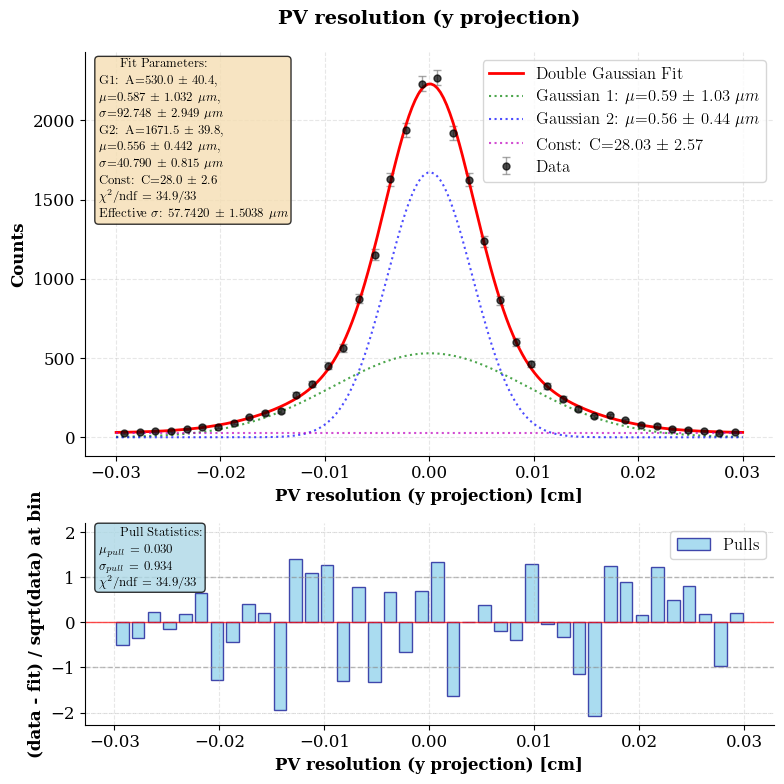

In [13]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_y'
sig_PV_df_sel = PV_diff_y[abs(PV_diff_y) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection)',
    x_label='PV resolution (y projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 511
Final objective value: 13425.759981
Chi-squared: 13425.76
Reduced chi-squared: 406.841
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 0.0000 +- nan
         mu = -0.029220 +- 594.503500
         sigma = 0.029230 +- 1232.184184
Gauss 2: A = 206.9032 +- 98.5544
         mu = 0.000388 +- 0.005437
         sigma = 0.029230 +- nan
Constant: C = 0.0000 +- 92.7555
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000388 +- nan
Effective Sigma: 0.029230 +- nan
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimi

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 157
Final objective value: 763.986804
Chi-squared: 763.99
Reduced chi-squared: 23.151
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 87.7202 +- 1024.5970
         mu = -140.099413 +- 1650.978226
         sigma = 205.627862 +- 2410.717202
Gauss 2: A = 1343.6624 +- 54.5767
         mu = 0.000008 +- 0.000200
         sigma = 0.006863 +- 0.000214
Constant: C = 0.5798 +- 811.3153
------------------------------------------------------------
Derived quantities:
Effective Mean: -8.585780 +- 138.199648
Effective Sigma: 50.904230 +- 658.812049
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 274
Final objective value: 399.321624
Chi-squared: 399.32
Reduced chi-squared: 12.101
--------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Fit problems!
Optimization result:
Success: False
Message: Max. number of function evaluations reached
Number of iterations: 17
Final objective value: 19441.936834
Chi-squared: 19441.94
Reduced chi-squared: 589.150
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2.5567 +- 2.3781
         mu = 0.029240 +- 0.166616
         sigma = 0.029230 +- 0.155246
Gauss 2: A = 13.5220 +- nan
         mu = 0.001030 +- 0.027977
         sigma = 0.029230 +- nan
Constant: C = 0.1580 +- 9.6739
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.005516 +- nan
Effective Sigma: 0.029230 +- nan
Method: COBYLA
Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objecti

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 528
Final objective value: 49.669397
Chi-squared: 49.67
Reduced chi-squared: 1.505
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1326.7894 +- 49.1619
         mu = -0.000066 +- 0.000067
         sigma = 0.004312 +- 0.000126
Gauss 2: A = 572.8852 +- 49.3456
         mu = 0.000108 +- 0.000123
         sigma = 0.009784 +- 0.000382
Constant: C = 37.2091 +- 4.1418
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000013 +- 0.000060
Effective Sigma: 0.006470 +- 0.000218
****************************************************************************************************
New best method: trust-constr, success: True
****************************************************************************************************
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: tru

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 528
Final objective value: 49.669397
Chi-squared: 49.67
Reduced chi-squared: 1.505
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1326.7894 +- 49.1619
         mu = -0.000066 +- 0.000067
         sigma = 0.004312 +- 0.000126
Gauss 2: A = 572.8852 +- 49.3456
         mu = 0.000108 +- 0.000123
         sigma = 0.009784 +- 0.000382
Constant: C = 37.2091 +- 4.1418
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000013 +- 0.000060
Effective Sigma: 0.006470 +- 0.000218


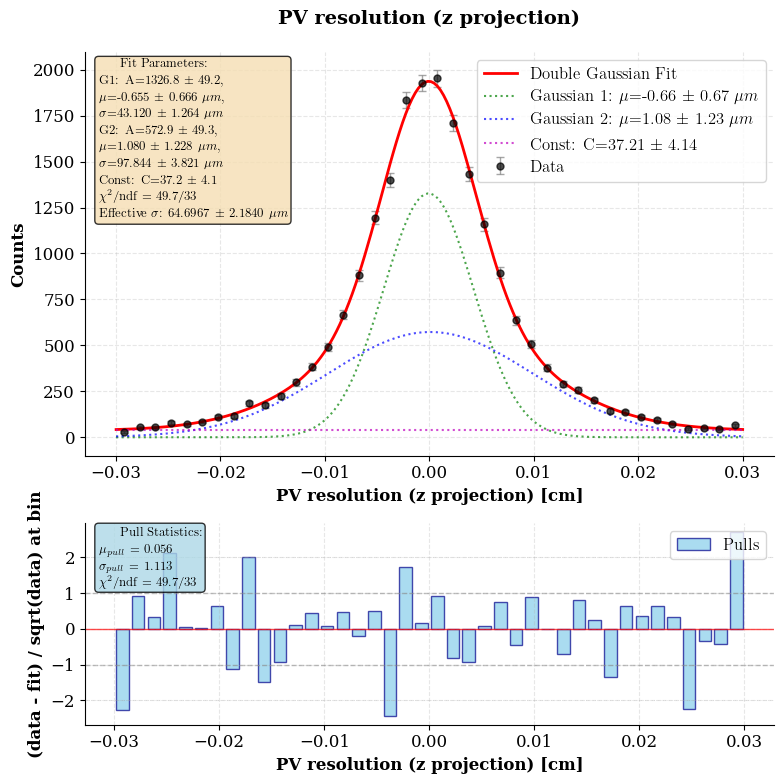

In [14]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


distr_name = 'PV_diff_z'
sig_PV_df_sel = PV_diff_z[abs(PV_diff_z) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection)',
    x_label='PV resolution (z projection) [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# Distributions after PV re-fit (Var-1)

## Prepare Env & Import Data

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_1.csv')

## max_chi2 distribution

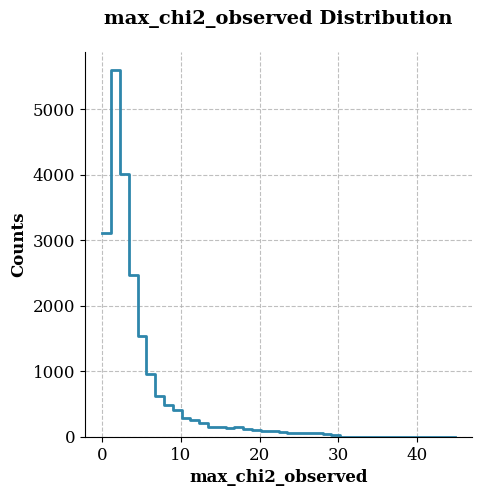

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))

distr_name = 'max_chi2_observed'

sns.histplot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    x=distr_name,
    color='#2E86AB',
    alpha=1,
    element='step',
    fill=False,
    linewidth=2,
    bins=40,
    ax=ax
)

ax.set_title(f'{distr_name} Distribution', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel(f'{distr_name}', fontweight='bold')
ax.set_ylabel('Counts', fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(True, alpha=0.8, linestyle='--')

## zeroth approximation

In [17]:
res_x = []
res_y = []
res_z = []

cuts = sorted(df['max_chi2_cut'].unique(), reverse=True)

for cut in cuts:

    PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']
    PV_diff_y = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']
    PV_diff_z = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

    print(f'\n{'='*50}\nCut value: {cut}\n{'='*50}')

    res_x_val = PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4
    res_y_val = PV_diff_y[abs(PV_diff_y) < 0.03].std() * 1e4
    res_z_val = PV_diff_z[abs(PV_diff_z) < 0.03].std() * 1e4

    res_x.append(res_x_val)
    res_y.append(res_y_val)
    res_z.append(res_z_val)

    print(f'Mean number of removed tracks: {df.loc[df['max_chi2_cut'] == cut, 'num_removed_tracks'].mean()}')
    print(f'x-projection PV resolution [cm]: {res_x_val}')
    print(f'y-projection PV resolution [cm]: {res_y_val}')
    print(f'z-projection PV resolution [cm]: {res_z_val}')
    
res_x = np.array(res_x)
res_y = np.array(res_y)
res_z = np.array(res_z)

print(f'Best x at cut: {cuts[res_x.argmin()]}')
print(f'Best y at cut: {cuts[res_y.argmin()]}')
print(f'Best z at cut: {cuts[res_z.argmin()]}')


Cut value: 30.0
Mean number of removed tracks: 0.07870283461610662
x-projection PV resolution [cm]: 71.29227248203492
y-projection PV resolution [cm]: 71.02196049141884
z-projection PV resolution [cm]: 79.85447634793825

Cut value: 12.0
Mean number of removed tracks: 0.1612539891120706
x-projection PV resolution [cm]: 69.38876134624813
y-projection PV resolution [cm]: 69.00269124641073
z-projection PV resolution [cm]: 77.80652535593163

Cut value: 11.0
Mean number of removed tracks: 0.17486390088229772
x-projection PV resolution [cm]: 69.17390539132916
y-projection PV resolution [cm]: 68.84274775258532
z-projection PV resolution [cm]: 77.63835643439738

Cut value: 10.0
Mean number of removed tracks: 0.18960015017833678
x-projection PV resolution [cm]: 68.8520059856255
y-projection PV resolution [cm]: 68.5746304010623
z-projection PV resolution [cm]: 77.45893628992356

Cut value: 9.0
Mean number of removed tracks: 0.2093579876102872
x-projection PV resolution [cm]: 68.67850679810003
y-

## Cut properties

In [ ]:
from analysis_scripts.draw_scripts import hist_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='tracks_per_vertex',
    ax=axes[0][0],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='num_removed_tracks',
    ax=axes[0][1],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_PV',
    ax=axes[1][0],
    bins=40
)


hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_per_ndf_PV',
    ax=axes[1][1],
    bins=40
)

plt.tight_layout()

## Resolutions

### x-projection (cut = 5)

Method: Nelder-Mead
Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 476.879062
Chi-squared: 476.88
Reduced chi-squared: 14.451
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2168.6531 +- 59.3152
         mu = -0.000047 +- 0.000108
         sigma = 0.005237 +- 0.000105
Gauss 2: A = 43.3529 +- 16.2373
         mu = 0.001980 +- 0.003335
         sigma = 0.029134 +- nan
Constant: C = 1.8623 +- 15.3655
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000008 +- 0.000125
Effective Sigma: 0.006597 +- nan
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 31
Final objective value: 57.755694
Chi-squared: 57.76
Reduced chi-squared: 1.750
------------------------------------------------------------
Fit parameters with e

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 298
Final objective value: 1214.208452
Chi-squared: 1214.21
Reduced chi-squared: 36.794
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1628.2399 +- 80.1141
         mu = -0.000057 +- 0.000200
         sigma = 0.006102 +- 0.000200
Gauss 2: A = -27.9846 +- 794.0342
         mu = 72.313591 +- 1097.841802
         sigma = -20.845416 +- 308.478431
Constant: C = 27.3721 +- 5.1286
------------------------------------------------------------
Derived quantities:
Effective Mean: -1.264647 +- 41.249154
Effective Sigma: nan
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 92
Final objective value: 563.151074
Chi-squared: nan
Reduced chi-squared: nan
-------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Return from COBYLA because the objective function has been evaluated MAXFUN times.
Skip method: COBYLA
Method: COBYQA


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))


Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 18186.495349
Chi-squared: 18186.50
Reduced chi-squared: 551.106
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 22.9603 +- nan
         mu = 0.000354 +- 0.013607
         sigma = 0.017292 +- 0.019062
Gauss 2: A = 19.6508 +- nan
         mu = 0.000424 +- 0.015159
         sigma = 0.017394 +- 0.020628
Constant: C = 20.1316 +- 59.7539
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000386 +- nan
Effective Sigma: 0.017339 +- nan
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 362
Final objective value: 414.294874
Chi-squared: 414.29
Reduced chi-squared: 12.554
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 82.6334 +- 22.8700
         mu = 0.013996 +- 0.001211
         sigma = 0.003635 +- 0.000927
Gauss 2: A = 2226.7508 +- 57.9577
         mu = -0.000177 +- 0.000112
         sigma = 0.005119 +- 0.000120
Constant: C = 25.5395 +- 3.4012
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000330 +- 0.000179
Effective Sigma: 0.005073 +- 0.000120
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
******************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


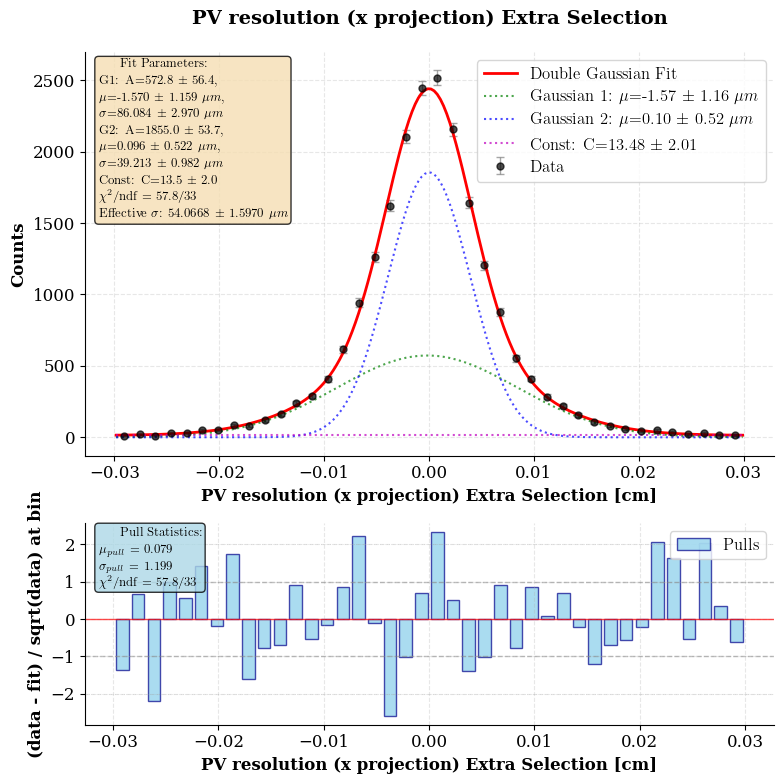

In [18]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_x'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection) Extra Selection',
    x_label='PV resolution (x projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection (cut = 5)

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 422
Final objective value: 18636.351883
Chi-squared: 18636.35
Reduced chi-squared: 564.738
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 53.0381 +- 182.1928
         mu = 0.028583 +- 0.023990
         sigma = 0.028713 +- 0.040775
Gauss 2: A = 48.0599 +- 181.4744
         mu = -0.028844 +- 0.027350
         sigma = 0.028713 +- 0.044635
Constant: C = 0.0000 +- 228.4669
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.001284 +- 0.075316
Effective Sigma: 0.028713 +- 0.030130
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: Tru

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 631
Final objective value: 506.784182
Chi-squared: 506.78
Reduced chi-squared: 15.357
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 2104.0960 +- 59.5599
         mu = -0.000019 +- 0.000111
         sigma = 0.005384 +- 0.000115
Gauss 2: A = -54.7096 +- 951.4754
         mu = -39.098683 +- 825.075845
         sigma = 6.081846 +- 671.924933
Constant: C = 29.0958 +- 3.5216
------------------------------------------------------------
Derived quantities:
Effective Mean: 1.043744 +- 28.852752
Effective Sigma: nan
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 47
Final objective value: 18746.215453
Chi-squared: 18746.22
Reduced chi-squared: 568.067
-------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 17621.850959
Chi-squared: 17621.85
Reduced chi-squared: 533.995
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 36.0056 +- nan
         mu = 0.000192 +- 0.009838
         sigma = 0.016135 +- 0.013848
Gauss 2: A = 25.8107 +- nan
         mu = 0.000222 +- 0.011710
         sigma = 0.016193 +- 0.016456
Constant: C = 17.5690 +- 58.4443
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000205 +- nan
Effective Sigma: 0.016159 +- nan
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 417
Final objective value: 26.027096
Chi-squared: 26.03
Reduced chi-squared: 0.789
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 624.3150 +- 36.7071
         mu = -0.000088 +- 0.000073
         sigma = 0.008329 +- 0.000168
Gauss 2: A = 1759.8327 +- 35.9566
         mu = -0.000016 +- 0.000037
         sigma = 0.003868 +- 0.000063
Constant: C = 14.6226 +- 1.3087
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000035 +- 0.000033
Effective Sigma: 0.005405 +- 0.000097
****************************************************************************************************
New best method: trust-constr, success: True
****************************************************************************************************
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: tr

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 417
Final objective value: 26.027096
Chi-squared: 26.03
Reduced chi-squared: 0.789
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 624.3150 +- 36.7071
         mu = -0.000088 +- 0.000073
         sigma = 0.008329 +- 0.000168
Gauss 2: A = 1759.8327 +- 35.9566
         mu = -0.000016 +- 0.000037
         sigma = 0.003868 +- 0.000063
Constant: C = 14.6226 +- 1.3087
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000035 +- 0.000033
Effective Sigma: 0.005405 +- 0.000097


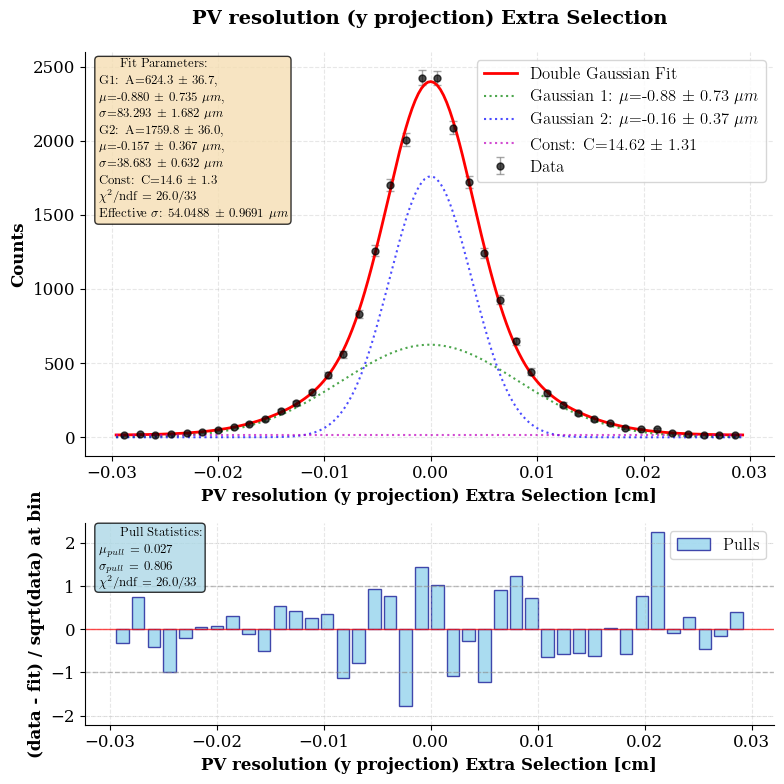

In [19]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_y'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection) Extra Selection',
    x_label='PV resolution (y projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection (cut = 5)

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 344
Final objective value: 17175.544607
Chi-squared: 17175.54
Reduced chi-squared: 520.471
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 73.3207 +- 207.7746
         mu = 0.029234 +- 0.020072
         sigma = 0.029230 +- 0.034138
Gauss 2: A = 77.6978 +- 208.3615
         mu = -0.029226 +- 0.018190
         sigma = 0.029230 +- 0.032385
Constant: C = 0.0000 +- 260.8951
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000843 +- 0.058553
Effective Sigma: 0.029230 +- 0.023502
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: Tr

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 433
Final objective value: 928.411154
Chi-squared: 928.41
Reduced chi-squared: 28.134
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1463.9285 +- 62.6139
         mu = -0.000002 +- 0.000199
         sigma = -0.006656 +- 0.000201
Gauss 2: A = 134.0237 +- nan
         mu = 43.536288 +- nan
         sigma = -145.134220 +- nan
Constant: C = -86.6036 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: 3.651480 +- nan
Effective Sigma: 42.031870 +- nan
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 150
Final objective value: 395.467078
Chi-squared: 395.47
Reduced chi-squared: 11.984
----------------------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../an

Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 16877.417660
Chi-squared: 16877.42
Reduced chi-squared: 511.437
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 27.9094 +- 1099.3058
         mu = -0.000301 +- 0.013700
         sigma = 0.019420 +- 0.023817
Gauss 2: A = 21.9730 +- 1117.2942
         mu = -0.000324 +- 0.015521
         sigma = 0.019196 +- 0.027591
Constant: C = 31.3766 +- 89.6735
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000311 +- 0.010277
Effective Sigma: 0.019322 +- 0.018378
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 438
Final objective value: 32.426566
Chi-squared: 32.43
Reduced chi-squared: 0.983
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1541.9578 +- 44.2962
         mu = 0.000063 +- 0.000048
         sigma = 0.004280 +- 0.000096
Gauss 2: A = 578.2346 +- 46.4255
         mu = -0.000178 +- 0.000096
         sigma = 0.009145 +- 0.000270
Constant: C = 22.2602 +- 2.2337
------------------------------------------------------------
Derived quantities:
Effective Mean: -0.000003 +- 0.000044
Effective Sigma: 0.006011 +- 0.000153
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
*******************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


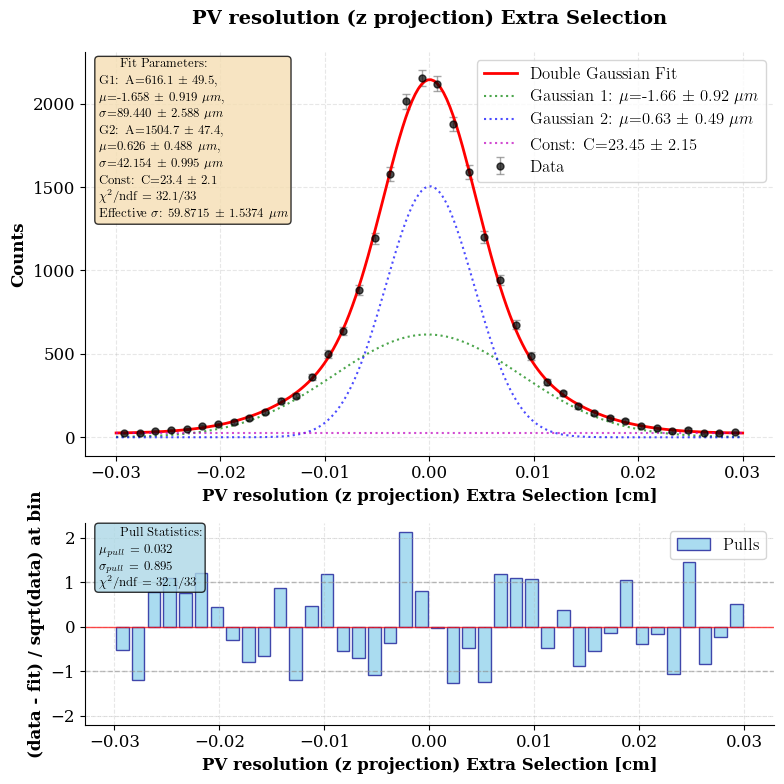

In [20]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 5.

distr_name = 'PV_diff_ES_z'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection) Extra Selection',
    x_label='PV resolution (z projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

# Distributions after PV re-fit (Var-2)

## Prepare Env & Import Data

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import os


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

parent_dir = os.path.join(current_dir, '..')
sys.path.insert(0, parent_dir)


df = pd.read_csv('/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/Data/ana_PV_27_var_2.csv')

## max_chi2 distribution

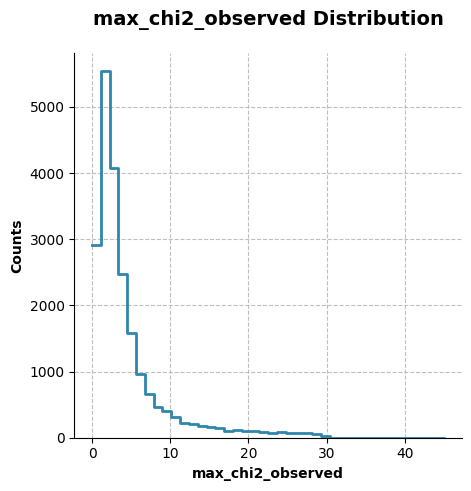

In [16]:
from analysis_scripts.draw_scripts import hist_plot


distr_name = 'max_chi2_observed'

fig, ax = plt.subplots(figsize=(5, 5))

hist_plot(
    data=df[(df['max_chi2_cut'] == 30.0) & (df['max_chi2_observed'] < 50.0)],
    distr_name=distr_name,
    ax=ax,
    bins=40
)

## zeroth approximation

In [17]:
res_x = []
res_y = []
res_z = []

cuts = sorted(df['max_chi2_cut'].unique(), reverse=True)

for cut in cuts:

    PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']
    PV_diff_y = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']
    PV_diff_z = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

    print(f'\n{'='*50}\nCut value: {cut}\n{'='*50}')

    res_x_val = PV_diff_x[abs(PV_diff_x) < 0.03].std() * 1e4
    res_y_val = PV_diff_y[abs(PV_diff_y) < 0.03].std() * 1e4
    res_z_val = PV_diff_z[abs(PV_diff_z) < 0.03].std() * 1e4

    res_x.append(res_x_val)
    res_y.append(res_y_val)
    res_z.append(res_z_val)

    print(f'Mean number of removed tracks: {df.loc[df['max_chi2_cut'] == cut, 'num_removed_tracks'].mean()}')
    print(f'x-projection PV resolution [cm]: {res_x_val}')
    print(f'y-projection PV resolution [cm]: {res_y_val}')
    print(f'z-projection PV resolution [cm]: {res_z_val}')
    
res_x = np.array(res_x)
res_y = np.array(res_y)
res_z = np.array(res_z)

print(f'Best x at cut: {cuts[res_x.argmin()]}')
print(f'Best y at cut: {cuts[res_y.argmin()]}')
print(f'Best z at cut: {cuts[res_z.argmin()]}')


Cut value: 30.0
Mean number of removed tracks: 0.08070043659922069
x-projection PV resolution [cm]: 73.30686184646147
y-projection PV resolution [cm]: 73.1311732894916
z-projection PV resolution [cm]: 83.31001808255598

Cut value: 12.0
Mean number of removed tracks: 0.1707901037509976
x-projection PV resolution [cm]: 71.32735203265861
y-projection PV resolution [cm]: 71.4758181776582
z-projection PV resolution [cm]: 82.1148024536945

Cut value: 11.0
Mean number of removed tracks: 0.18341861884418573
x-projection PV resolution [cm]: 71.08023957099782
y-projection PV resolution [cm]: 71.43779502260011
z-projection PV resolution [cm]: 82.0585925041709

Cut value: 10.0
Mean number of removed tracks: 0.20027228768602412
x-projection PV resolution [cm]: 70.90805510747144
y-projection PV resolution [cm]: 71.25702343278739
z-projection PV resolution [cm]: 81.93479997327337

Cut value: 9.0
Mean number of removed tracks: 0.2207408102905967
x-projection PV resolution [cm]: 70.7708100524849
y-pro

## Cut properties

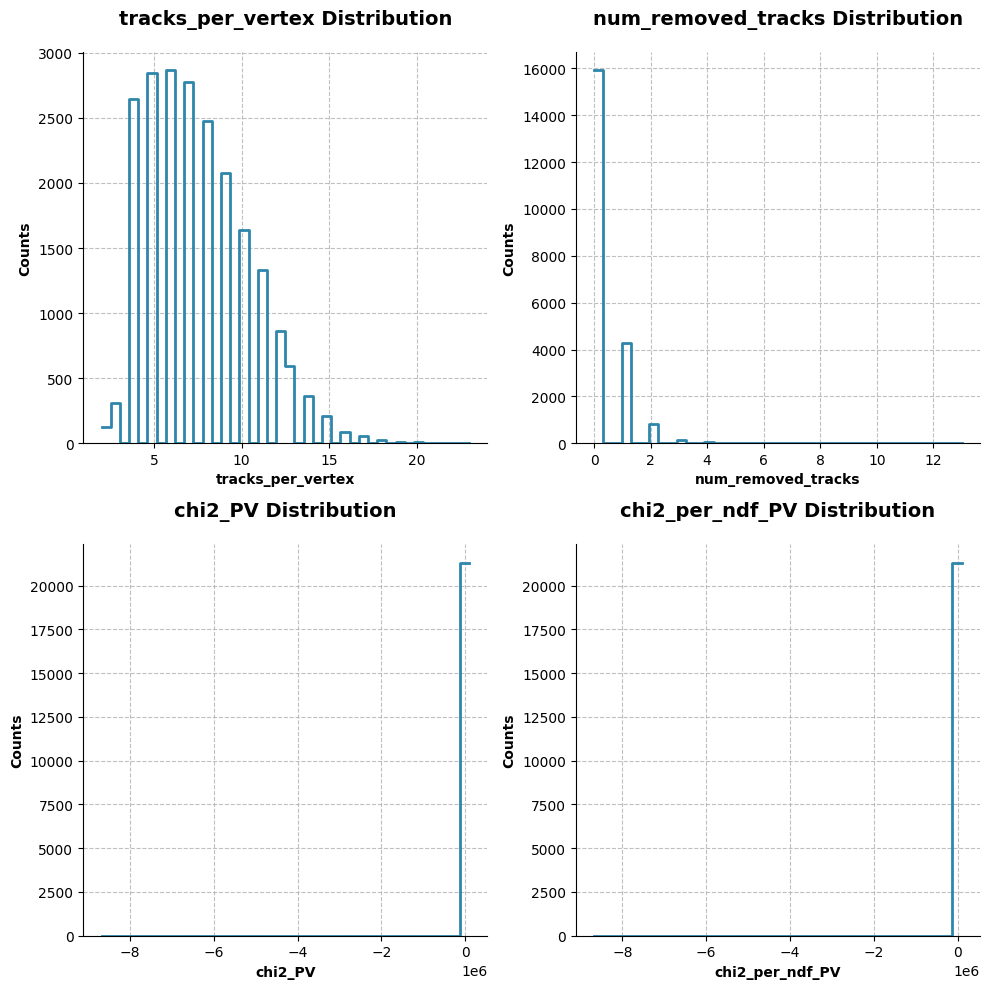

In [18]:
from analysis_scripts.draw_scripts import hist_plot


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='tracks_per_vertex',
    ax=axes[0][0],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='num_removed_tracks',
    ax=axes[0][1],
    bins=40
)

hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_PV',
    ax=axes[1][0],
    bins=40
)


hist_plot(
    data=df[df['max_chi2_cut'] == 6.0],
    distr_name='chi2_per_ndf_PV',
    ax=axes[1][1],
    bins=40
)

plt.tight_layout()

## Resolutions

### x-projection (cut = 6)

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 418
Final objective value: 18400.406236
Chi-squared: 18400.41
Reduced chi-squared: 557.588
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 54.9873 +- 158.6857
         mu = 0.029084 +- 0.017929
         sigma = 0.029159 +- 0.035207
Gauss 2: A = 51.0050 +- 159.2236
         mu = -0.029235 +- 0.020874
         sigma = 0.029159 +- 0.038049
Constant: C = 0.0000 +- 198.7570
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.001020 +- 0.063391
Effective Sigma: 0.029159 +- 0.025862
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: Tru

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 140
Final objective value: 1768.112772
Chi-squared: 1768.11
Reduced chi-squared: 53.579
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = -262.1840 +- 1256.7569
         mu = 196.795723 +- 951.992620
         sigma = -130.169971 +- 626.894577
Gauss 2: A = 1382.9393 +- 88.1065
         mu = 0.000099 +- 0.000271
         sigma = -0.006686 +- 0.000278
Constant: C = 110.4706 +- 416.5917
------------------------------------------------------------
Derived quantities:
Effective Mean: -46.037305 +- 351.792384
Effective Sigma: nan
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 64
Final objective value: 594.417470
Chi-squared: 594.42
Reduced chi-squared: 18.013
-----------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:378: RuntimeWarning: invalid value encountered in sqrt
  effective_sigma = np.sqrt(effective_variance)
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 16394.295869
Chi-squared: 16394.30
Reduced chi-squared: 496.797
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 56.7131 +- nan
         mu = 0.000344 +- 0.006273
         sigma = 0.012605 +- 0.005662
Gauss 2: A = 29.9365 +- nan
         mu = 0.000353 +- 0.009192
         sigma = 0.012728 +- nan
Constant: C = 35.6501 +- 32.9372
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000347 +- nan
Effective Sigma: 0.012648 +- nan
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 399
Final objective value: 42.083792
Chi-squared: 42.08
Reduced chi-squared: 1.275
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 616.6780 +- 43.5665
         mu = 0.000297 +- 0.000096
         sigma = 0.008732 +- 0.000226
Gauss 2: A = 1734.2811 +- 42.8286
         mu = -0.000031 +- 0.000047
         sigma = 0.003892 +- 0.000082
Constant: C = 13.9526 +- 1.7949
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000055 +- 0.000043
Effective Sigma: 0.005583 +- 0.000129
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
********************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


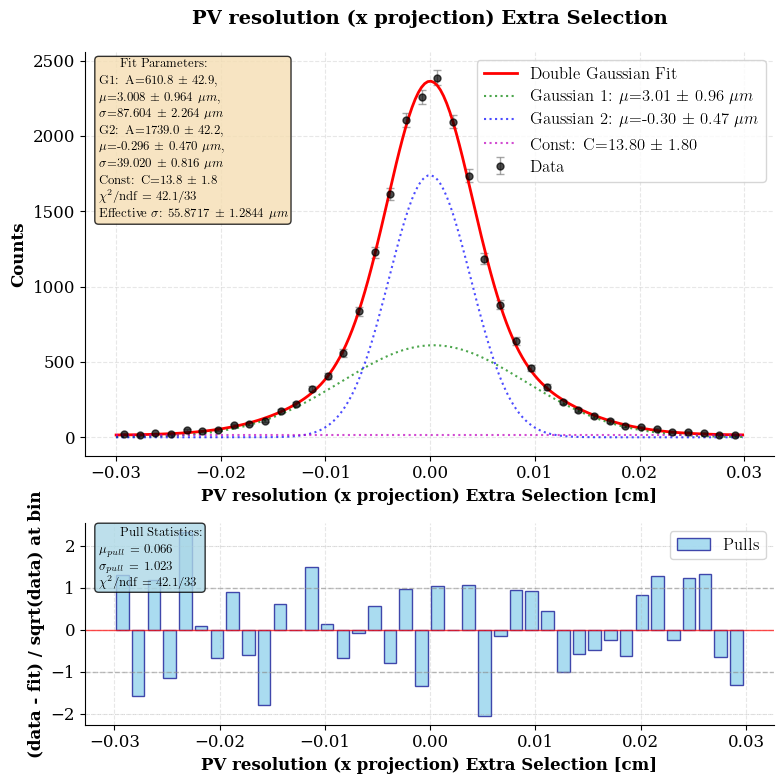

In [24]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_x'

PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_x']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (x projection) Extra Selection',
    x_label='PV resolution (x projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### y-projection (cut = 6)

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 495
Final objective value: 18018.887389
Chi-squared: 18018.89
Reduced chi-squared: 546.027
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 68.2835 +- 186.6041
         mu = 0.029242 +- 0.017850
         sigma = 0.029234 +- 0.033299
Gauss 2: A = 53.7177 +- 184.2235
         mu = -0.029227 +- 0.024381
         sigma = 0.029234 +- 0.041277
Constant: C = 0.0000 +- 232.3931
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.003498 +- 0.064864
Effective Sigma: 0.029234 +- 0.026032
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: Tru

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 496
Final objective value: 2467.502370
Chi-squared: 2467.50
Reduced chi-squared: 74.773
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1228.7687 +- 98.5621
         mu = 0.000019 +- 0.000342
         sigma = -0.006843 +- 0.000341
Gauss 2: A = 127.6157 +- 700.6450
         mu = 49.508348 +- 317.879793
         sigma = 125.684004 +- 741.436953
Constant: C = -84.1758 +- 647.8232
------------------------------------------------------------
Derived quantities:
Effective Mean: 4.658019 +- 37.832884
Effective Sigma: 38.551442 +- 246.809117
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 168
Final objective value: 496.110582
Chi-squared: 496.11
Reduced chi-squared: 15.034
---------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 17417.130149
Chi-squared: 17417.13
Reduced chi-squared: 527.792
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 26.0153 +- nan
         mu = 0.001319 +- 0.012823
         sigma = 0.017977 +- 0.020453
Gauss 2: A = 27.7104 +- nan
         mu = -0.000505 +- 0.003551
         sigma = 0.017813 +- 0.019526
Constant: C = 23.1614 +- 72.5692
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000378 +- nan
Effective Sigma: 0.017893 +- nan
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 604
Final objective value: 48.822108
Chi-squared: 48.82
Reduced chi-squared: 1.479
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 558.9211 +- 54.9380
         mu = 0.000068 +- 0.000113
         sigma = 0.008730 +- 0.000310
Gauss 2: A = 1789.4734 +- 52.6123
         mu = 0.000017 +- 0.000050
         sigma = 0.003999 +- 0.000096
Constant: C = 19.1226 +- 2.2123
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000029 +- 0.000046
Effective Sigma: 0.005507 +- 0.000164
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
*********************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


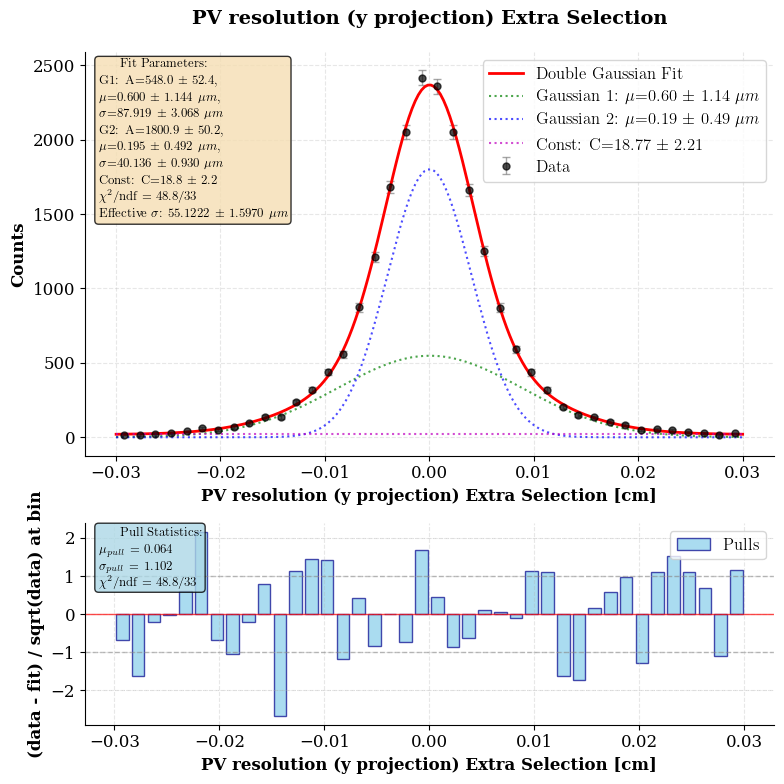

In [26]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_y'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_y']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (y projection) Extra Selection',
    x_label='PV resolution (y projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')

### z-projection (cut = 6)

Method: Nelder-Mead
Optimization result:
Success: True
Message: Optimization terminated successfully.
Number of iterations: 354
Final objective value: 14597.405432
Chi-squared: nan
Reduced chi-squared: nan
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 0.0000 +- nan
         mu = -0.029146 +- nan
         sigma = 0.029174 +- nan
Gauss 2: A = 177.0902 +- nan
         mu = 0.001183 +- nan
         sigma = 0.029174 +- nan
Constant: C = 0.0000 +- nan
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.001183 +- nan
Effective Sigma: 0.029174 +- nan
****************************************************************************************************
New best method: Nelder-Mead, success: True
****************************************************************************************************
Method: Powell
Optimization result:
Success: True
Message: Optimization terminated successfully.
Numbe

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method CG cannot handle bounds.
  result = minimize(


Fit problems!
Optimization result:
Success: False
Message: Maximum number of iterations has been exceeded.
Number of iterations: 1000
Final objective value: 1110.390760
Chi-squared: 1110.39
Reduced chi-squared: 33.648
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 651.9717 +- 774.5374
         mu = -0.000001 +- 0.000621
         sigma = 0.006285 +- 0.001154
Gauss 2: A = 652.1412 +- 762.7148
         mu = 0.000135 +- 0.000626
         sigma = 0.007687 +- 0.001593
Constant: C = 52.5013 +- 10.0518
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000067 +- 0.000444
Effective Sigma: 0.007021 +- 0.001169
Method: BFGS
Fit problems!
Optimization result:
Success: False
Message: Desired error not necessarily achieved due to precision loss.
Number of iterations: 43
Final objective value: 16165.271710
Chi-squared: 16165.27
Reduced chi-squared: 489.857
-------------------------------------------

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method Newton-CG cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: OptimizeWarning: Unknown solver options: maxiter
  result = minimize(


Optimization result:
Success: True
Message: Return from COBYLA because the trust region radius reaches its lower bound.
Skip method: COBYLA
Method: COBYQA
Fit problems!
Optimization result:
Success: False
Message: The maximum number of iterations has been exceeded
Number of iterations: 1000
Final objective value: 13832.453695
Chi-squared: 13832.45
Reduced chi-squared: 419.165
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 46.4860 +- nan
         mu = 0.000224 +- 0.007857
         sigma = 0.014079 +- 0.007963
Gauss 2: A = 75.1050 +- nan
         mu = 0.000271 +- 0.005865
         sigma = 0.014121 +- 0.006130
Constant: C = 51.4888 +- 52.0994
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000253 +- nan
Effective Sigma: 0.014105 +- nan
Method: SLSQP
Skip method: SLSQP
Method: trust-constr


/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:519: RuntimeWarning: invalid value encountered in sqrt
  param_errors = np.sqrt(np.diag(cov_matrix))
/home/ome123/python_envs/gen_DA-env/lib/python3.12/site-packages/scipy/optimize/_differentiable_functions.py:376: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


Optimization result:
Success: True
Message: `xtol` termination condition is satisfied.
Number of iterations: 310
Final objective value: 274.894425
Chi-squared: 274.89
Reduced chi-squared: 8.330
------------------------------------------------------------
Fit parameters with errors:
Gauss 1: A = 1837.1341 +- 40.8882
         mu = -0.000140 +- 0.000114
         sigma = 0.005757 +- 0.000125
Gauss 2: A = 90.5823 +- 19.6093
         mu = 0.015113 +- 0.001043
         sigma = 0.003501 +- 0.000633
Constant: C = 52.0591 +- 4.1313
------------------------------------------------------------
Derived quantities:
Effective Mean: 0.000576 +- 0.000190
Effective Sigma: 0.005671 +- 0.000124
Method: dogleg
Skip method: dogleg
Method: trust-ncg
Skip method: trust-ncg
Method: trust-exact
Skip method: trust-exact
Method: trust-krylov
Skip method: trust-krylov
********************************************************************************
*******************************************************************

/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method dogleg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-ncg cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-exact cannot handle bounds.
  result = minimize(
/home/ome123/Рабочий стол/SPD/SPD_Lc_pKpi_27/analysis_notebooks/../analysis_scripts/fit_scripts.py:434: RuntimeWarning: Method trust-krylov cannot handle bounds.
  result = minimize(


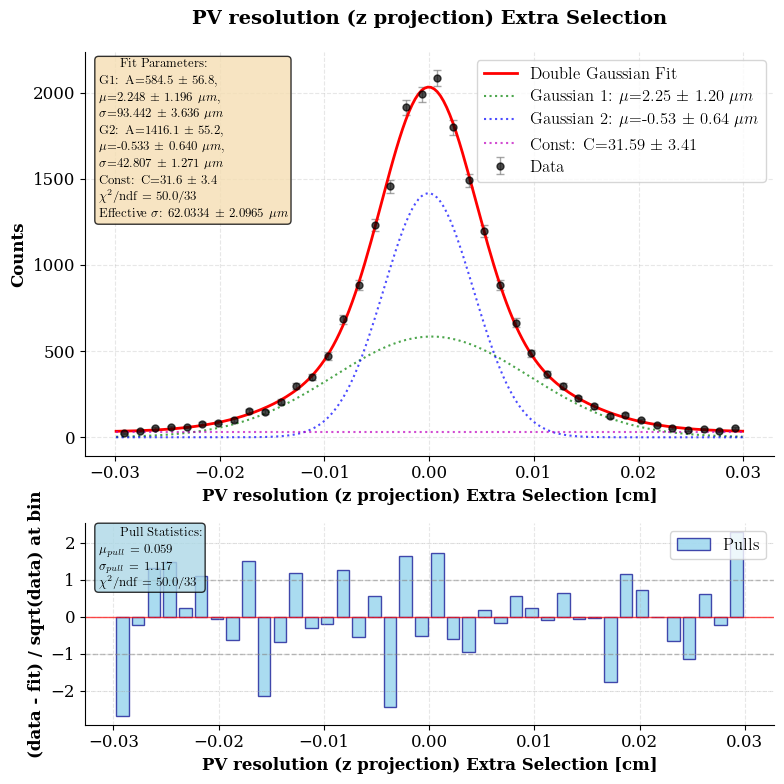

In [27]:
from analysis_scripts.fit_scripts import fit_distr_double_gauss


cut = 6.

distr_name = 'PV_diff_ES_z'
PV_diff_x = df.loc[df['max_chi2_cut'] == cut, 'PV_diff_ES_z']

sig_PV_df_sel = PV_diff_x[abs(PV_diff_x) < 0.03].copy()

methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'Newton-CG', 'L-BFGS-B',
           'TNC', 'COBYLA', 'COBYQA', 'SLSQP', 'trust-constr', 'dogleg',
           'trust-ncg', 'trust-exact', 'trust-krylov']

min_loss = 1e6
best_method = None

for method in methods:

    print(f'Method: {method}')

    if method in ('SLSQP'):
        print(f'Skip method: {method}')
        continue

    try:
        fit_res = fit_distr_double_gauss(
            distr=sig_PV_df_sel,
            title=distr_name,
            x_label=distr_name + ' [cm]',
            optimize_method=method,
            plot=False,
            bins=40,
            max_iter=1000
        )
    except:
        print(f'Skip method: {method}')
        continue
    
    result = fit_res['result']
    
    if result['success'] and result['fun'] < min_loss:
        print('*'*100)
        print(f'New best method: {method}, success: {result['success']}')
        print('*'*100)
        best_method = method
        min_loss = result['fun']
    
print('*' * 80)
print('*' * 80)
print('*' * 80)
print(f'{best_method=}')

if best_method is None:
    raise ValueError('No successful fit')

result = fit_distr_double_gauss(
    distr=sig_PV_df_sel,
    title='PV resolution (z projection) Extra Selection',
    x_label='PV resolution (z projection) Extra Selection [cm]',
    optimize_method=best_method,
    plot=True,
    bins=40,
    max_iter=1000
)

# plt.savefig(f'../plots/{distr_name}_Sig.pdf')